# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Loading Dataset

# Train Data

In [2]:
train_data = pd.read_csv(r'C:\Users\Rachna\Downloads\train (1).csv')

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.shape

(891, 12)

# Cleaning of Raw Data

## checking Null Values :

In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Percentage of missing Data

In [7]:
train_data.isnull().sum()/train_data.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

* in the Cabin there are greater than 70% data is missing so it is not possible to fill it.
* now Droping the Cabin column

In [8]:
train_data.pop('Cabin')

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [9]:
train_data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# Filling Missing Values

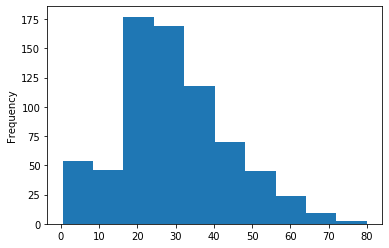

In [10]:
train_data['Age'].plot.hist()

* Here curve is the bell shaped ,so fill the missing values by Mean

In [11]:
train_data['Age'].fillna(train_data['Age'].mean() , inplace = True)

* Embarked column is categorical so fill the missing values by Mode

In [12]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
train_data['Embarked'].fillna(value = 'S' , inplace = True)

In [14]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

* Now, All Missing values are filled.

# Droping Irrelevant Columns 

In [15]:
train_data.drop(['Name', 'PassengerId'] , axis = 1, inplace = True)

In [16]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [17]:
train_data.pop('Ticket')

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [18]:
train_data.keys()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [20]:
gender=pd.get_dummies(train_data["Sex"], drop_first=True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


# Label Encoding

In [21]:
lab = LabelEncoder()
train_data["Embarked"] = lab.fit_transform(train_data["Embarked"])
train_data["Embarked"].head(10)

0    2
1    0
2    2
3    2
4    2
5    1
6    2
7    2
8    2
9    0
Name: Embarked, dtype: int32

In [22]:
train_data = pd.concat((train_data,gender),axis=1)
train_data = train_data.drop(["Sex"],axis=1)

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int32  
 7   male      891 non-null    uint8  
dtypes: float64(2), int32(1), int64(4), uint8(1)
memory usage: 46.2 KB


# EDA

In [24]:
eda = pd.read_csv(r'C:\Users\Rachna\Downloads\train (1).csv')

In [25]:
eda.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


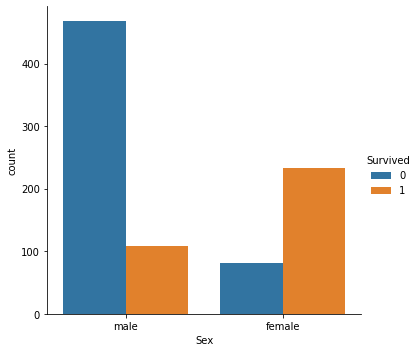

In [26]:
sns.catplot(x = 'Sex' , hue = 'Survived' , kind = 'count', data = eda)

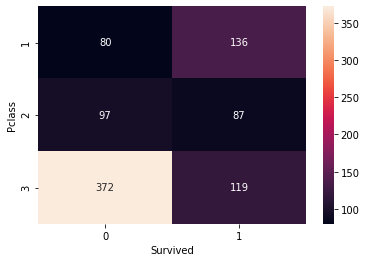

In [27]:
group = eda.groupby(['Pclass', 'Survived']) 
pclass_survived = group.size().unstack() 
sns.heatmap(pclass_survived, annot = True, fmt ="d")

C:\Users\Rudra Pratap Patel\anaconda34\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Rudra Pratap Patel\anaconda34\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


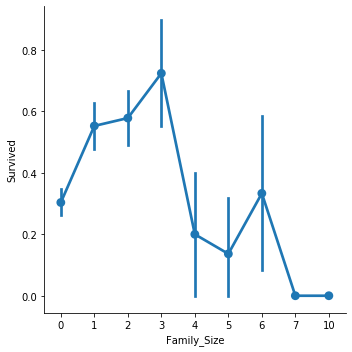

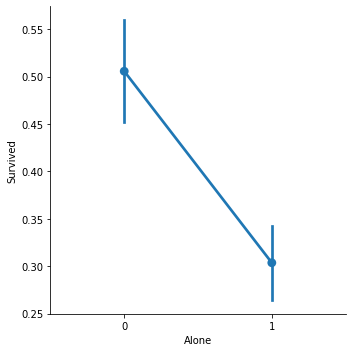

In [28]:
eda['Family_Size'] = 0
eda['Family_Size'] = eda['Parch'] + eda['SibSp'] 

# Adding a column Alone 

eda['Alone'] = 0
eda.loc[eda.Family_Size == 0, 'Alone'] = 1

sns.factorplot(x ='Family_Size', y ='Survived', data =eda) 

sns.factorplot(x ='Alone', y ='Survived', data = eda)

In [29]:
eda['Fare_range'] = pd.qcut(eda['Fare'],5)

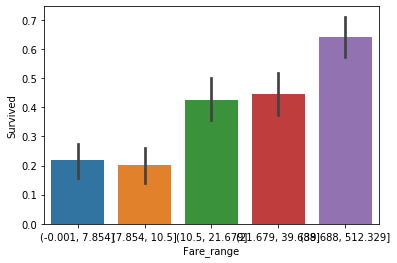

In [30]:
sns.barplot(x = 'Fare_range',y = 'Survived',data = eda)

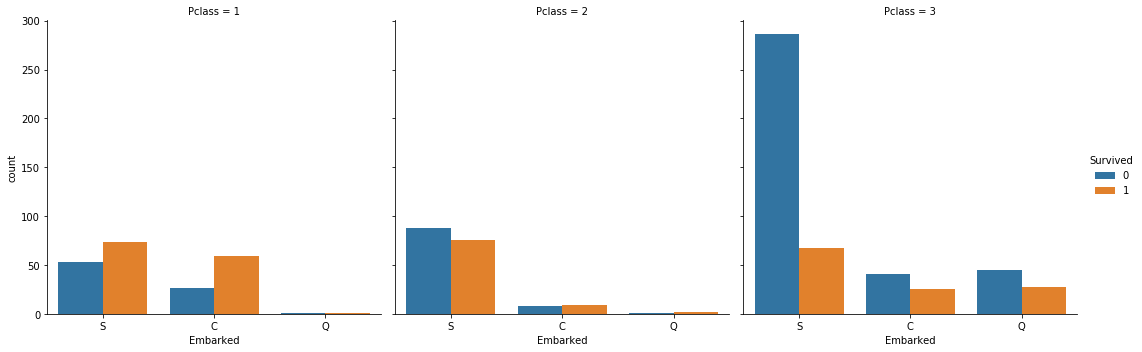

In [31]:
sns.catplot(x = 'Embarked',hue = 'Survived',kind = 'count',col = 'Pclass', data = eda)

# spliting data into dependent and independent variable

In [32]:
y = train_data['Survived']
X = train_data.drop(['Survived'],axis = 1)

In [33]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,3,22.0,1,0,7.2500,2,1
1,1,38.0,1,0,71.2833,0,0
2,3,26.0,0,0,7.9250,2,0
3,1,35.0,1,0,53.1000,2,0
4,3,35.0,0,0,8.0500,2,1


In [34]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Train The Model Using Logistic Regression

In [35]:
model = LogisticRegression()


In [36]:
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Test_data

## Loading Dataset

In [37]:
df = pd.read_csv(r'C:\Users\Rachna\Downloads\test (4).csv')

In [38]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [39]:
df.shape

(418, 11)

# Cleaning the Test data

##  Checking Null Values

In [40]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# percentage of missing values

In [41]:
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

* there are above 70% missing values in Cabin column
* drop the Cabin column

In [42]:
df.pop('Cabin')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 418, dtype: object

In [43]:
df.keys()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# Filling missing Values in Test_data

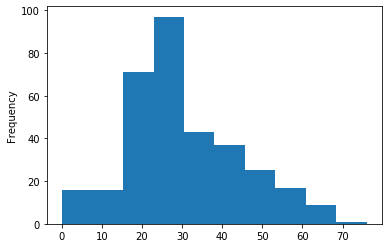

In [44]:
df['Age'].plot.hist()

* The Curve is Bell shaped so fill the missing values by Mean

In [45]:
df['Age'].fillna(df['Age'].mean() , inplace = True)

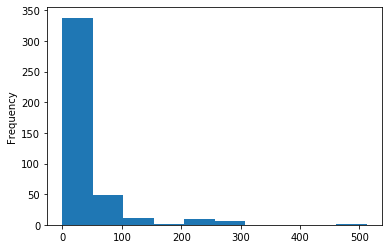

In [46]:
df['Fare'].plot.hist()

In [47]:
df['Fare'].fillna(df['Fare'].mean() , inplace = True)

In [48]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

* Now , all missing values are filled

# Droping the Irrelevant columns

In [49]:
df.drop(['PassengerId','Name'],axis = 1 , inplace = True)

In [50]:
df

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,34.50000,0,0,330911,7.8292,Q
1,3,female,47.00000,1,0,363272,7.0000,S
2,2,male,62.00000,0,0,240276,9.6875,Q
3,3,male,27.00000,0,0,315154,8.6625,S
4,3,female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,A.5. 3236,8.0500,S
414,1,female,39.00000,0,0,PC 17758,108.9000,C
415,3,male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,3,male,30.27259,0,0,359309,8.0500,S


In [51]:
df.pop('Ticket')

0                  330911
1                  363272
2                  240276
3                  315154
4                 3101298
              ...        
413             A.5. 3236
414              PC 17758
415    SOTON/O.Q. 3101262
416                359309
417                  2668
Name: Ticket, Length: 418, dtype: object

In [52]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [53]:
le = LabelEncoder()
df["Embarked"]=le.fit_transform(df["Embarked"])

In [54]:
gender = pd.get_dummies(df["Sex"],drop_first=True)
gender.head()

,male
0,1
1,0
2,1
3,1
4,0


In [55]:
df=pd.concat((df,gender),axis=1)
df=df.drop(["Sex"],axis=1)
df

,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,3,34.50000,0,0,7.8292,1,1
1,3,47.00000,1,0,7.0000,2,0
2,2,62.00000,0,0,9.6875,1,1
3,3,27.00000,0,0,8.6625,2,1
4,3,22.00000,1,1,12.2875,2,0
...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,2,1
414,1,39.00000,0,0,108.9000,0,0
415,3,38.50000,0,0,7.2500,2,1
416,3,30.27259,0,0,8.0500,2,1


# Prediction

In [56]:
y_pred = model.predict(df)

In [57]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [58]:
test_data = pd.read_csv(r'C:\Users\Rachna\Downloads\test (4).csv')

In [59]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
pred = pd.DataFrame(y_pred,columns = ['predictions'])

In [61]:
data = [test_data["PassengerId"], pred["predictions"]]
headers = ["PassengerId", "Survived"]
final_data = pd.concat(data, axis=1, keys=headers)

In [62]:
final_data.to_csv("titanic_pred.csv",index=False)

In [63]:
final_data

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
